0.210000
0.220000
0.230000
0.240000
0.250000
0.260000
0.270000
0.280000
0.290000
0.300000
0.310000
0.320000
0.330000
0.340000
0.350000
0.360000
0.370000
0.380000
0.390000
0.400000
0.410000
0.420000
0.430000
0.440000
0.450000
0.460000
0.470000
0.480000
0.490000
0.500000
0.510000
0.520000
0.530000
0.540000
0.550000
0.560000
0.570000
0.580000
0.590000
0.600000
0.610000
0.620000
0.630000
0.640000
0.650000
0.660000
0.670000
0.680000
0.690000
0.700000
0.710000
0.720000
0.730000
0.740000
0.750000
0.760000
0.770000
0.780000
0.790000
0.800000


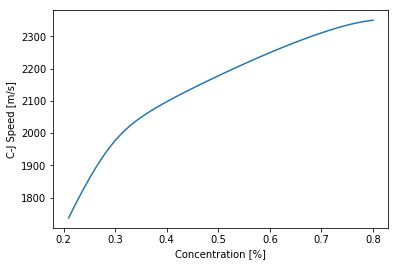

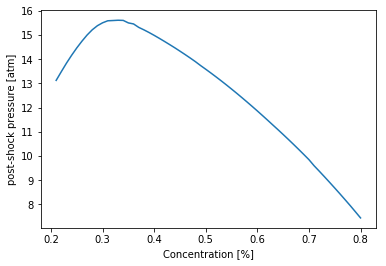

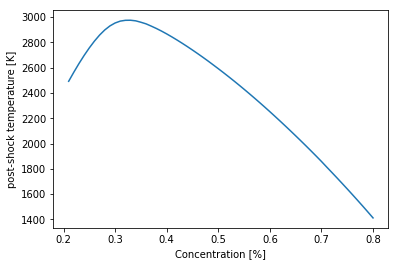

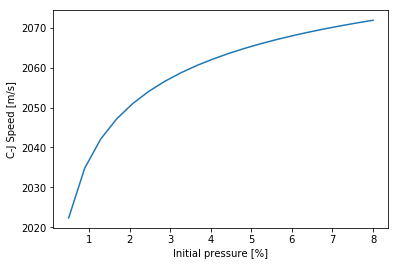

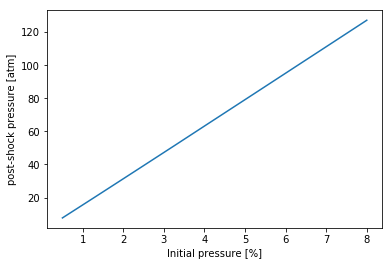

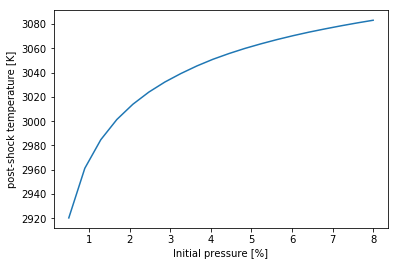

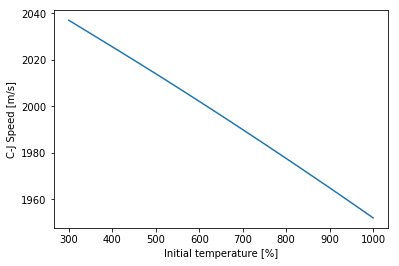

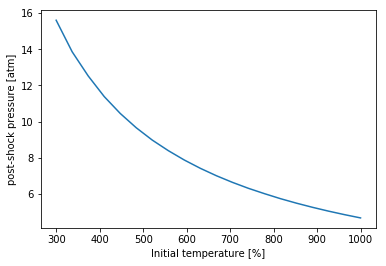

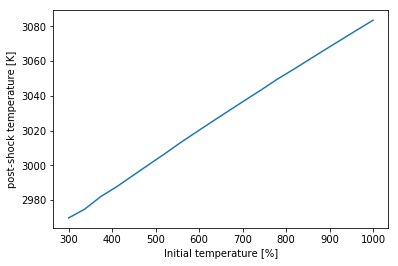

In [82]:
import cantera as ct
import SDToolbox as sd
import matplotlib.pyplot as plt
import numpy as np

mech = 'gri30_highT.cti';
pressure_array = np.linspace(0.5,8,20)
temperature_array = np.linspace(300,1000,20)
conc = []

#initial conditions fos variable concentrations
P1=one_atm; P1atm=P1/one_atm;
T1=300;



T2 = []
P2 = []
speed = []

j = 0
#loop that iterate thrue concentrations
while j < 60:
    nH2 = 0.21 + float(j)/100
    nO2 = (1-nH2) /4.76
    nN2 = (1-nH2) *3.76/4.76
    X  =  'H2:'+str(nH2)+ ' ' + 'O2:'+str(nO2) + ' ' + 'N2:'+str(nN2)
    conc.append(nH2)
    [cj_speed,R2] = sd.CJspeed(P1, T1, X, mech, 0);
    gas = sd.PostShock_eq(cj_speed, P1, T1, X, mech)
    T2.append(gas.T)
    P2.append(gas.P/one_atm)
    speed.append(cj_speed)
    print "%f" % (conc[j])
    #print "%s; temperature: %f, pressure: %f, CJspeed: %f" % (X, T2[j], P2[j], speed[j])
    j = j + 1
    
plt.plot(conc,speed)
plt.xlabel('Concentration [%]')
plt.ylabel('C-J Speed [m/s]')
plt.show()

plt.plot(conc,P2)
plt.xlabel('Concentration [%]')
plt.ylabel('post-shock pressure [atm]')
plt.show()

plt.plot(conc,T2)
plt.xlabel('Concentration [%]')
plt.ylabel('post-shock temperature [K]')
plt.show()

#intial condidtions for variable initial pressure
T1 = 300
nH2 = 0.34
nO2 = (1-nH2) /4.76
nN2 = (1-nH2) *3.76/4.76
X  =  'H2:'+str(nH2)+ ' ' + 'O2:'+str(nO2) + ' ' + 'N2:'+str(nN2)

T2 = []
P2 = []
speed = []
for P1 in pressure_array:
    [cj_speed,R2] = sd.CJspeed(P1*one_atm, T1, X, mech, 0);
    gas = sd.PostShock_eq(cj_speed, P1*one_atm, T1, X, mech)
    T2.append(gas.T)
    P2.append(gas.P/one_atm)
    speed.append(cj_speed)

i = 0

#for i in range(len(pressure_array)):
#    print "temperature: %f, pressure: %f, CJspeed: %f" % (T2[i], P2[i], speed[i])

plt.plot(pressure_array,speed)
plt.xlabel('Initial pressure [%]')
plt.ylabel('C-J Speed [m/s]')
plt.show()

plt.plot(pressure_array,P2)
plt.xlabel('Initial pressure [%]')
plt.ylabel('post-shock pressure [atm]')
plt.show()

plt.plot(pressure_array,T2)
plt.xlabel('Initial pressure [%]')
plt.ylabel('post-shock temperature [K]')
plt.show()    

#intial condidtions for variable initial temperature
P1 = one_atm
nH2 = 0.34
nO2 = (1-nH2) /4.76
nN2 = (1-nH2) *3.76/4.76
X  =  'H2:'+str(nH2)+ ' ' + 'O2:'+str(nO2) + ' ' + 'N2:'+str(nN2)

T2 = []
P2 = []
speed = []
for T1 in temperature_array:
    [cj_speed,R2] = sd.CJspeed(P1, T1, X, mech, 0);
    gas = sd.PostShock_eq(cj_speed, P1, T1, X, mech)
    T2.append(gas.T)
    P2.append(gas.P/one_atm)
    speed.append(cj_speed)

i = 0

#for i in range(len(temperature_array)):
    #print "For: initial temperature: %f; temperature: %f, pressure: %f, CJspeed: %f" % (temperature_array[i], T2[i], P2[i], speed[i])

plt.plot(temperature_array,speed)
plt.xlabel('Initial temperature [%]')
plt.ylabel('C-J Speed [m/s]')
plt.show()

plt.plot(temperature_array,P2)
plt.xlabel('Initial temperature [%]')
plt.ylabel('post-shock pressure [atm]')
plt.show()

plt.plot(temperature_array,T2)
plt.xlabel('Initial temperature [%]')
plt.ylabel('post-shock temperature [K]')
plt.show()    
